In [1]:
%matplotlib nbagg

# Cálculo numérico das probabilidades de fluxos no modelo da minha tese

In [2]:
from mpmath import *
from matplotlib.pyplot import plot as plt
from scipy.optimize import curve_fit
import numpy as np

In [3]:
libmp.BACKEND

'gmpy'

In [3]:
def gauss(x,m,sd):
    aux = np.array(x)
    return 1/np.sqrt(2*np.pi*sd*sd)*np.exp(-(aux-m)*(aux-m)/(2*sd*sd))

In [4]:
def F(s):
    aux = nprod(lambda l: power((power(2,l+1)/s*sinh(s/power(2,l+1))),power(2,l)),[1,inf])
    return exp(-10*s)*aux

def G(s,m,b):
    aux = nprod(lambda l: power((power(2,l+1)/(s*b)*sinh(s*b/power(2,l+1))),power(2,l)),[1,inf])
    return exp(-m*s)*aux

In [19]:
%%time
invertlaplace(F,1e4)

CPU times: user 1.75 s, sys: 0 ns, total: 1.75 s
Wall time: 1.75 s


mpf('9.8447506007287742053708e-22')

In [57]:
a = [lambda t: invertlaplace(G,t), gauss(t,1.5/3)]

In [58]:
a(10)

[mpf('0.89958292169061383844144'), mpf('0.79788456080286535587939')]

<IPython.core.display.Javascript object>


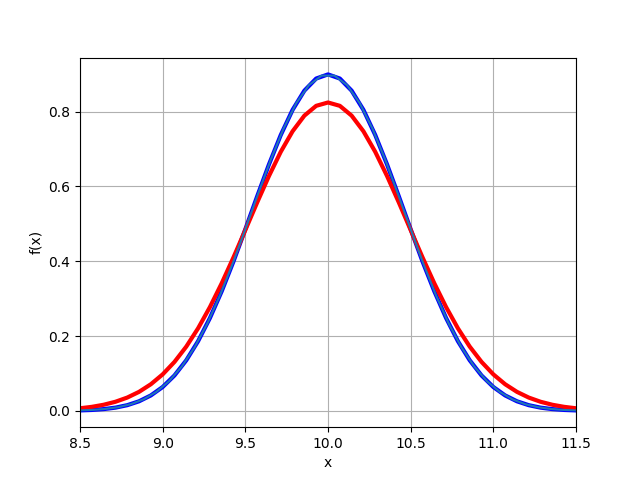

CPU times: user 1min 16s, sys: 80.3 ms, total: 1min 16s
Wall time: 1min 16s


In [61]:
%%time
#plot(lambda t: invertlaplace(F,t), [8.5,11.5], points=50)
plot([lambda t: invertlaplace(G,t), lambda t: gauss(t,1.5/3.1)], [8.5,11.5], points=42)

<IPython.core.display.Javascript object>


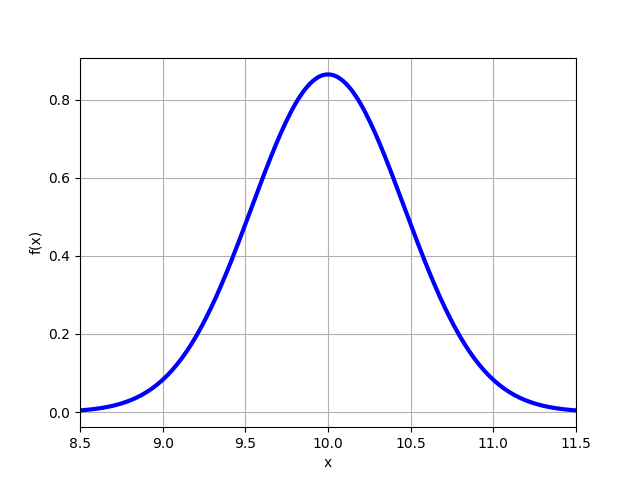

In [53]:
plot(lambda t: gauss(t,1.5/3.25), [8.5,11.5])

In [ ]:
x = linspace(m-err,m+err,25)

In [65]:
%%time
mp.dps=180
err = 1/np.sqrt(12)
m = 100
y = [invertlaplace(lambda s: G(s,m,1),t) for t in x]
x = [float(v) for v in x]
y = [float(v) for v in y]

CPU times: user 52min 21s, sys: 2.79 s, total: 52min 24s
Wall time: 52min 35s


In [11]:
def gauss_fit(t,sd):
    return gauss(t,10,sd)

In [15]:
popt, pcov = curve_fit(gauss_fit, np.array(x), np.array(y), p0=[np.sqrt(0.05*0.05/12)])

In [19]:
gauss(1e4,1e4,1/np.sqrt(12.))

1.3819765978853418

<IPython.core.display.Javascript object>


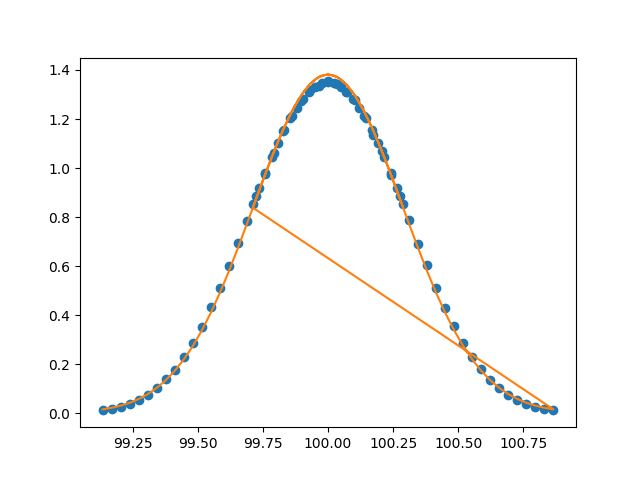

In [72]:
plt(x,y,'o')
plt(x,gauss(x,1.0e2,1/np.sqrt(12)))

In [36]:
[i,j for i,j in ]

matrix(
[['99.1339745962155660663484013639390468597412109375', '99.168615612366949108036351390182971954345703125', '99.20325662851831793886958621442317962646484375', '99.2378976446697009805575362406671047210693359375', '99.2725386608210698113907710649073123931884765625', '99.30717967697245285307872109115123748779296875', '99.3418206931238358947666711173951625823974609375', '99.3764617092752047255999059416353702545166015625', '99.41110272542658776728785596787929534912109375', '99.445743741577956598121090792119503021240234375', '99.4803847577293396398090408183634281158447265625', '99.51502577388072268149699084460735321044921875', '99.549666790032091512330225668847560882568359375', '99.5843078061834745540181756950914859771728515625', '99.6189488223348433848514105193316936492919921875', '99.653589838486226426539360545575618743896484375', '99.6882308546376094682273105718195438385009765625', '99.7228718707889782990605453960597515106201171875', '99.75751288694036134074849542230367660522460937

In [68]:
A = np.matrix([[x[i],y[i]] for i in range(len(x))])
#f = open('numericalinverselaplace_j=100_beta=1.dat', 'w')
np.savetxt('numericalinverselaplace_j=100_beta=1_.dat',A)
#f.close()

In [70]:
!cat 'numericalinverselaplace_j=100_beta=1_.dat' >>'numericalinverselaplace_j=100_beta=1.dat'

In [71]:
x,y = np.loadtxt('numericalinverselaplace_j=100_beta=1.dat').transpose()

In [12]:
x = np.linspace(0,2.,501)
y = gauss(x,1.01,1/np.sqrt(12.))
A = np.matrix([[x[i],y[i]] for i in range(len(x))])
np.savetxt('gauss_j=1.01_beta=1_.dat',A)

In [13]:
x[500]

2.0